# BIOS512 Assignment #5

📈 For this assignment we will work with inflation data provided by the [US Bureah of Labor Statistics](https://www.bls.gov/cpi/tables/). The data is provided as `excel` files. We have the data for years 2019-2023 in our `assignemnts` folder under the filename `revised-seasonally-adjusted-indexes-2023.xlsx`.

Let's read the data in first. You'll need to load both the `tidyverse` and the `readxl` libraries.

In [1]:
library('tidyverse')
library('readxl')



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Now you should have a function in your session called `read_excel`. Pass in the filename from above as a `string` to the `read_excel` function and capture the `tibble` output with a variable called `df_price_index`.  

In [8]:
df_price_index = read_excel("revised-seasonally-adjusted-indexes-2023.xlsx")



We want to plot the average `SEASONALLY_ADJUSTED_INDEX` for `Energy`, `Food`, `Shelter`, and `Used cars and trucks` per month for over the period covered in the dataset (2019-2023).

Execute this cell. You'll need this months vector for the picot operation below:

In [9]:
months = c('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC')

Here are the operations you'll need to perform:
- filter for...
  - `TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks')`
  - and, `DATA_TYPE == 'SEASONALLY ADJUSTED INDEX'`
- Pivot the columns for the Months so the table is in long-form and each row represents a month (hint: use `cols = months` with `pivot_longer`)
- Create a column for the date with this mutate operation: `mutate(date_str = glue::glue('{YEAR}-{name}-01') |> str_to_lower(), date = as.Date(date_str, format = '%Y-%b-%d'))`
- Group by `date` and `summarize` by taking the mean value for each date group.


The first three rows of your table will look something like this:

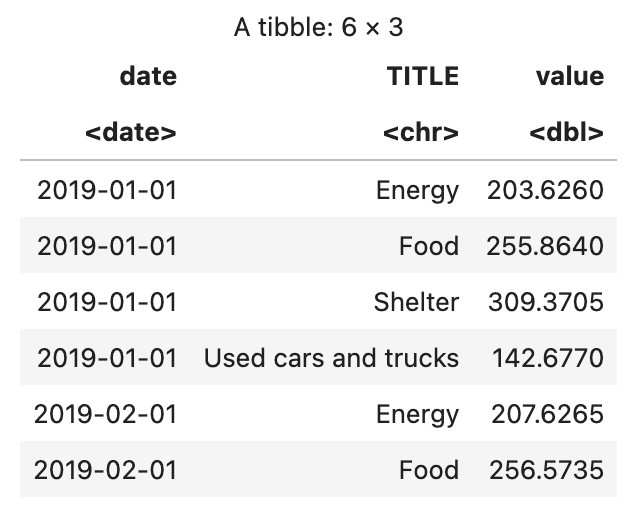

In [17]:
result = df_price_index |>
  filter(
    TITLE %in% c("Energy", "Food", "Shelter", "Used cars and trucks"),
    DATA_TYPE == "SEASONALLY ADJUSTED INDEX"
  ) |>
  pivot_longer(
    cols = all_of(months),
    names_to = "month",
    values_to = "value"
  ) |>
  mutate(
    date_str = paste(YEAR, month, "01", sep = "-"),
    date_str = str_to_title(date_str), # Capitalize the month abbreviation (e.g., Jan, Feb)
    date = as.Date(date_str, format = "%Y-%b-%d")
  ) |>
  group_by(date, TITLE) |>
  summarize(value = mean(value, na.rm = TRUE), .groups = "drop")

result

date,TITLE,value
<date>,<chr>,<dbl>
2019-01-01,Energy,203.6260
2019-01-01,Food,255.8640
2019-01-01,Shelter,309.3705
2019-01-01,Used cars and trucks,142.6770
2019-02-01,Energy,207.6265
2019-02-01,Food,256.5735
2019-02-01,Shelter,310.4100
2019-02-01,Used cars and trucks,142.7450
2019-03-01,Energy,214.6510


Ok! Now make this plot:

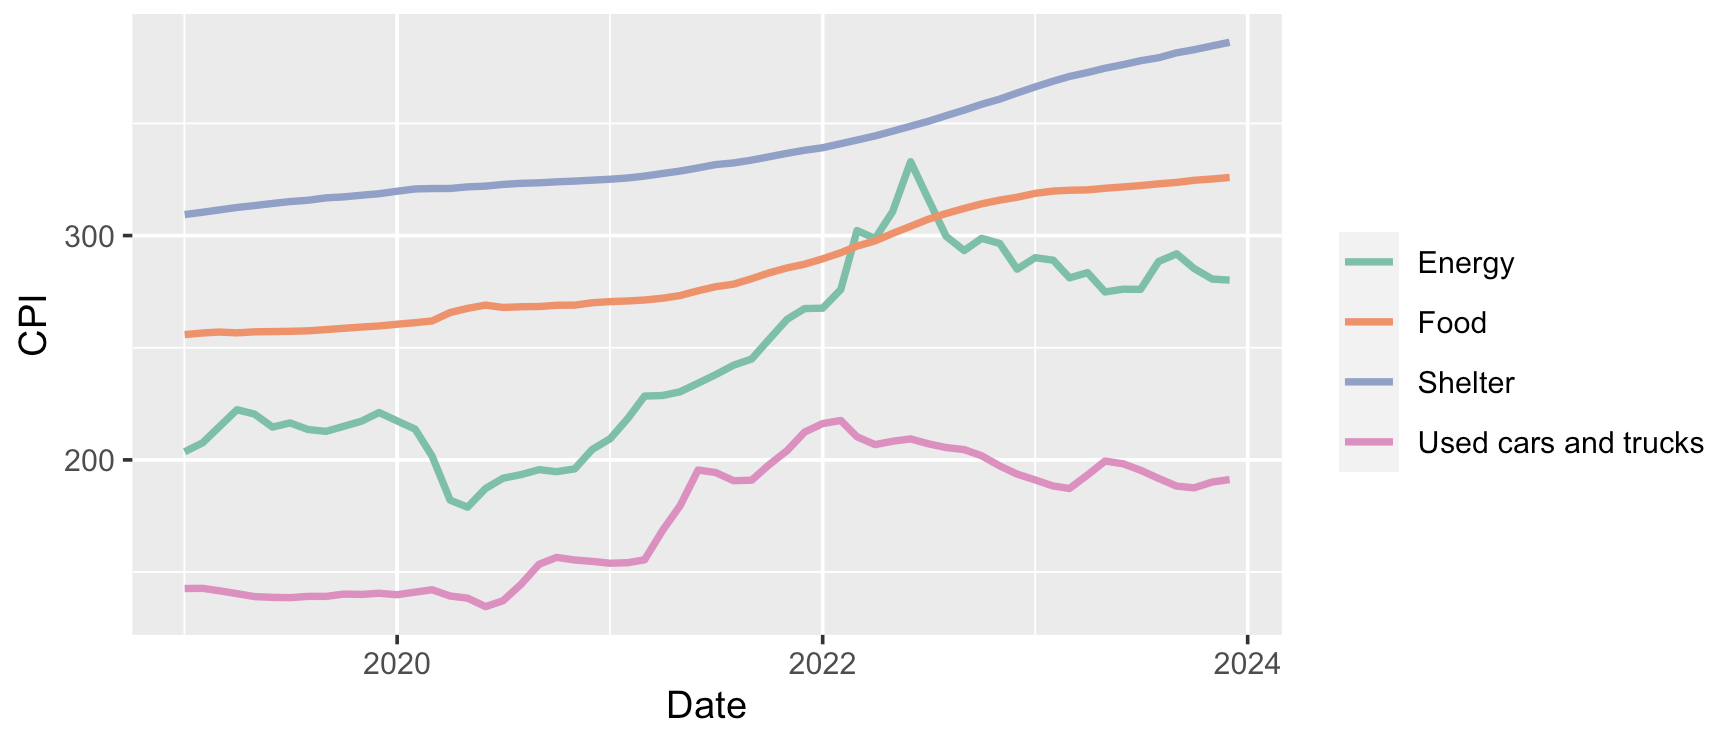

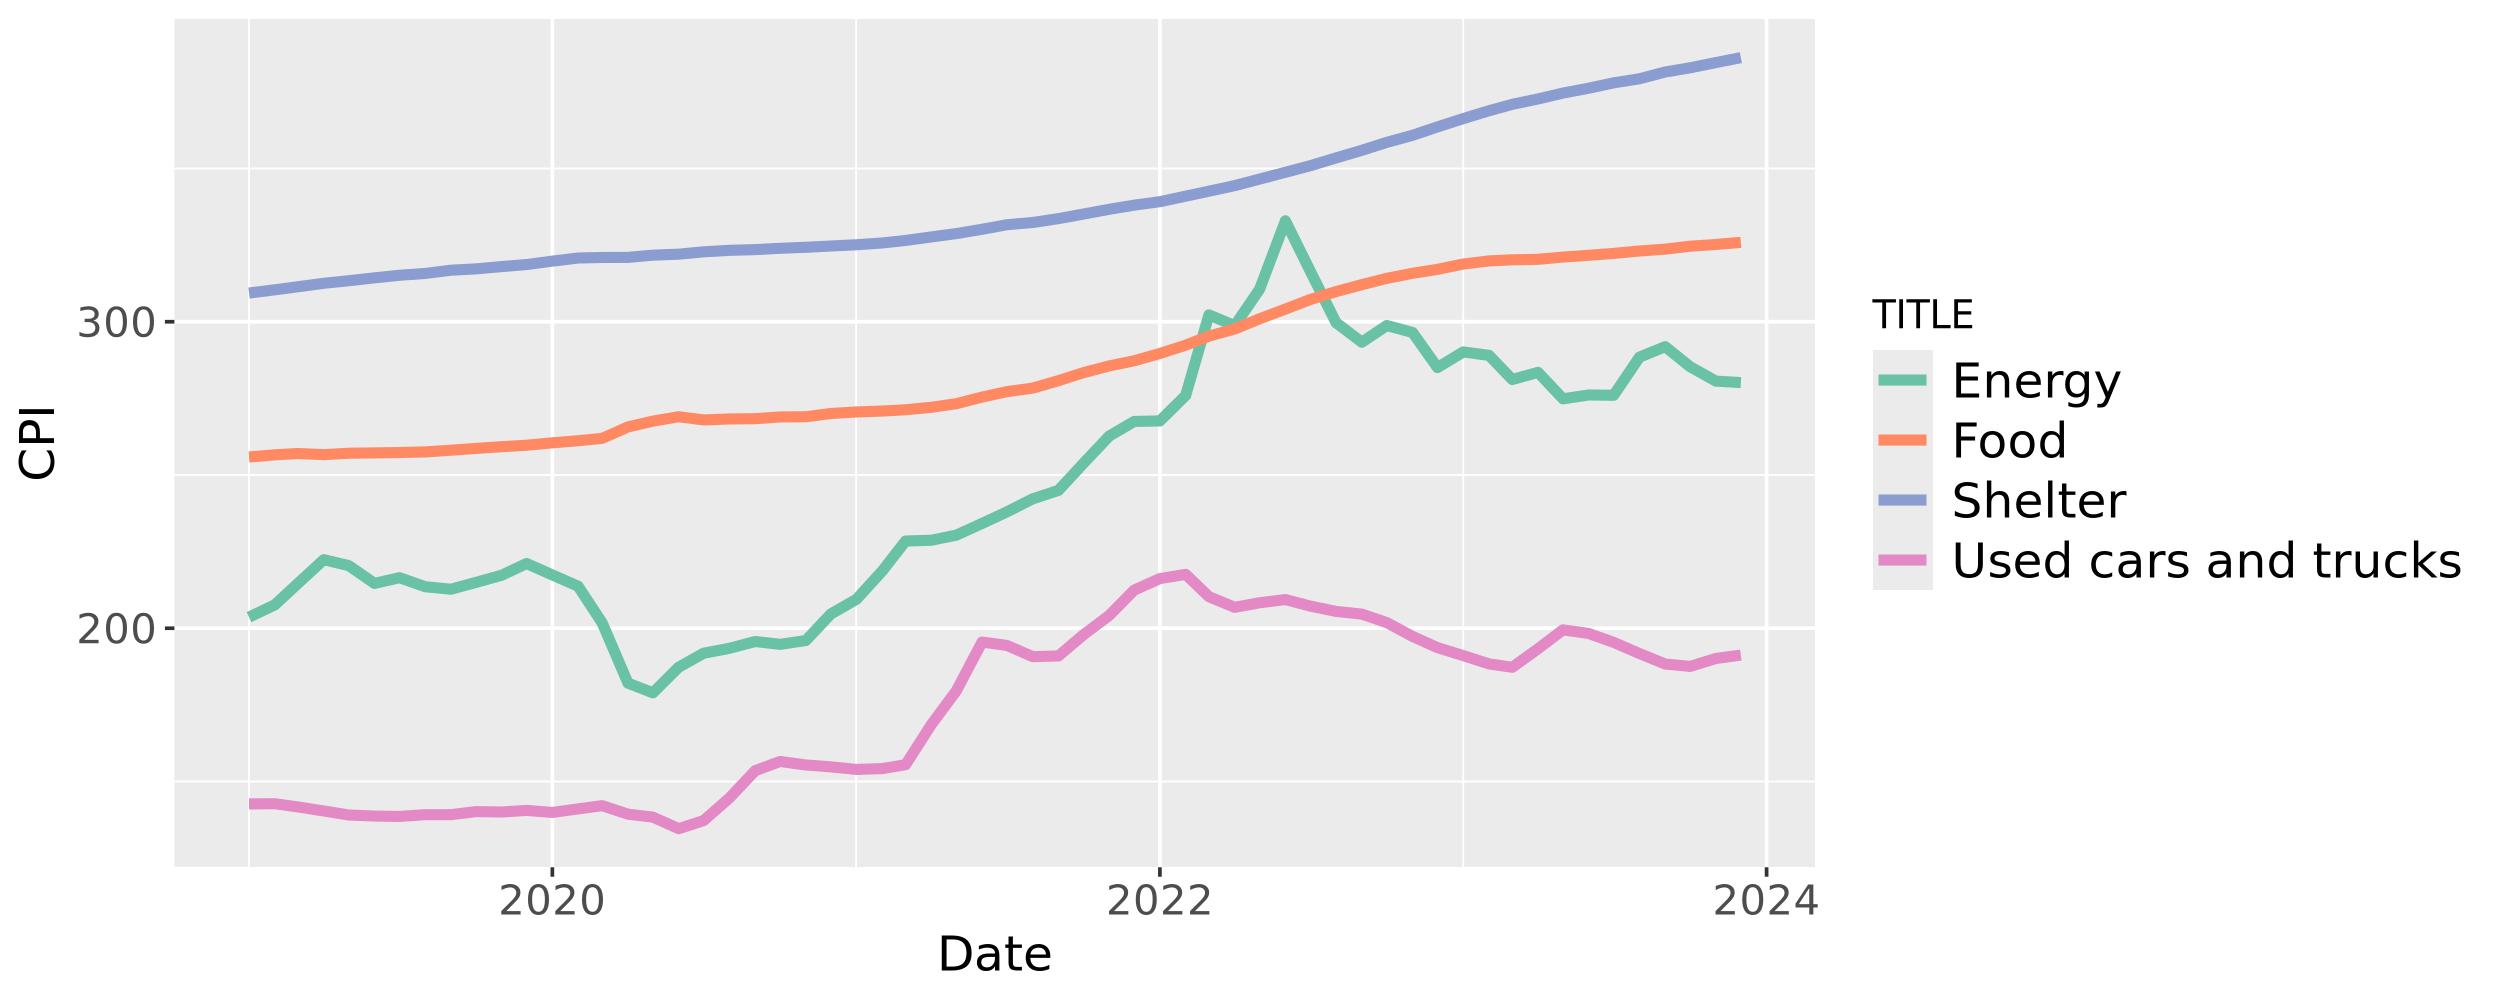

In [41]:
options(repr.plot.width = 10,repr.plot.height = 4)
ggplot(result, aes(x = date, y = value, color = TITLE)) +
  geom_line(size = 1.5) + 
  scale_color_manual(
    values = c(
      "Energy" = "#69c1a6",        
      "Food" = "#ff8962",
      "Shelter" = "#8b9dd0",
      "Used cars and trucks" = "#e38ac6"
    )
  ) +
  labs(
    x = "Date",
    y = "CPI",
  ) +
  theme(
    legend.text = element_text(size = 14), 
    axis.text = element_text(size = 12),   
    axis.title = element_text(size = 14)  
  )



This is how the [USBLS defines the index](https://www.bls.gov/cpi/) (if you're curious):

>  The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.